Pretty much every part of this code takes multiple minutes to run. I'm sorry :(

Number of paths found: 395


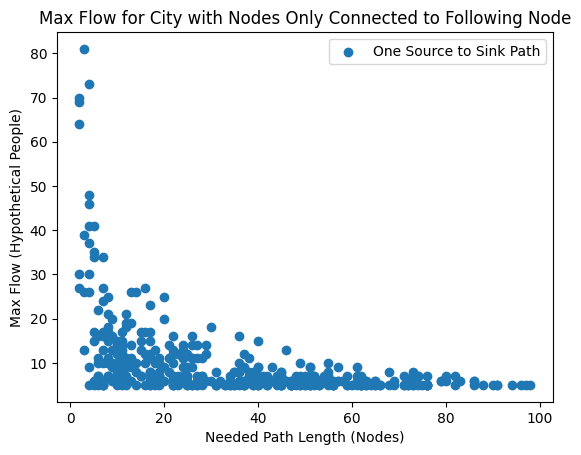

In [103]:
import random
import matplotlib.pyplot as plt
import numpy as np

class cityGraph:
    def __init__(self, size):
        #holds all the edges / edge capacities
        self.adj_matrix = [[0] * size for _ in range(size)]
        #size is number of vertices in graph
        self.size = size
        #holds name of all vertices
        self.nodeData = [''] * size

    #used to add an edge from vertex u to v with capacity c
    def myEdge(self, u, v, c):
        self.adj_matrix[u][v] = c

    #adds a node name to graph. Index is given with node, data is node name
    def myNodeData(self, node, data):
        if 0 <= node < self.size:
            self.nodeData[node] = data

    #graph needs a breadth first search algorithm
    #returns true if path ends with end (and a path has been found)
    #parent is the array that holds the path from sink back to source
            
    def breadthFirst(self, start, end, parent, count):
        if(count > 1000):
            #print("Path likely does not exist. Could not be found with 1000 searches")
            return False
        else:
            visited = [False] * self.size
            queue = [start]
            visited[start] = True

            while queue:
                #need to take first vertex to explore to next vertex
                u = queue.pop(0)

                #for loop to look through the entire adj matric and check if visited
                for i, v in enumerate(self.adj_matrix[u]):
                    if not visited[i] and v>0:
                        queue.append(i)
                        visited[i] = True
                        parent[i] = u
            return visited[end]

             
    #some creds to https://www.w3schools.com/dsa/dsa_algo_graphs_edmondskarp.php for help with edmondsKarp

    def edmondsKarp(self, source, sink):
        
        #need a parent that holds index values (invalid) because we don't start with augmented path
        #maxFlow is 0, while loop increases the maxFlow while there is aug path to increase flow in
        parent = [-1] * self.size
        maxFlow = 0

        path_names = []
        count = 0
        while self.breadthFirst(source, sink, parent, count):
            count+=1
            #initial flow is infinite
            pathFlow = float("Inf")
            s = sink
            while(s!= source):
                #pathFlow- go backwards and lowest capacity edge is what can be sent
                pathFlow = min(pathFlow, self.adj_matrix[parent[s]][s])
                s = parent[s]

            maxFlow += pathFlow
            v = sink

            #go backwards from sink
            #residual capacity is capacity that hasn't been used
            while(v != source):
                u = parent[v]
                self.adj_matrix[u][v] -= pathFlow
                self.adj_matrix[v][u] += pathFlow
                v = parent[v]
                
    
            path = []
            v = sink
            #tracks each time an augmented path is found + flow sent through path
            while(v != source):
                path.append(v)
                v = parent[v]
            path.append(source)
            path.reverse()
            path_names = [self.nodeData[node] for node in path]
            #print("Path:", .join(path_names), ", Flow:", pathFlow)


        if(len(path_names) > 0):
            
            return maxFlow, len(path_names)
        else:
            
            return maxFlow



#print(newYork.edmondsKarp(source, sink))

def testCityOneWay():

    demo1 = cityGraph(100)

    #set bus stop names list up
    busStops = []

    for i in range(100):
        demo1.myNodeData(i, str(i))

    for i in range(99):
        demo1.myEdge(i, i+1, random.randint(5,100))

    for i in range(99, 1, -1):
        demo1.myEdge(i, i-1, random.randint(5,100))



    source = random.randint(0,100)
    sink = random.randint(0,100)

    return (demo1.edmondsKarp(random.randint(0, 99), random.randint(0, 99)))



pathLength = []
myMax = []
for i in range(400):
    cityData = (testCityOneWay())
    if(type(cityData) is tuple):
       
        pathLength.append(cityData[1])
        myMax.append(cityData[0])
        #print(myMax)
    
    
print("Number of paths found:", len(myMax))
if(len(pathLength) != 0):
    plt.title("Max Flow for City with Nodes Only Connected to Following Node")
    plt.scatter(pathLength, myMax)
    plt.ylabel("Max Flow (Hypothetical People)")
    plt.xlabel("Needed Path Length (Nodes)")
    plt.legend(['One Source to Sink Path'],loc="upper right")
    plt.show()


The above graph demonstrates that for a graph where in order to get to the final node you must travel through every node, the maximum flow will be through the shortest path with the lowest chance of having a low max flow in the list of nodes to travel through. Max flow also cannot be larger than 100 because there are not mulitple paths.

Number of paths found 42


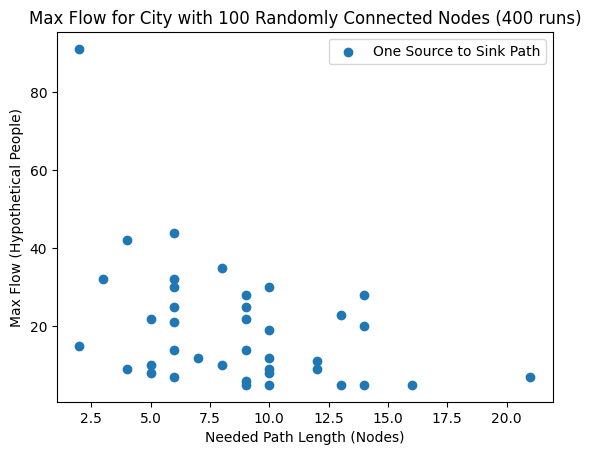

In [104]:
def connectedCity():
    demo2 = cityGraph(100)

    #set bus stop names list up
    busStops = []

    for i in range(100):
        demo2.myNodeData(i, str(i))


    for i in range(99):
        demo2.myEdge(i, random.randint(0, 99), random.randint(5,100))
            


    source = random.randint(0,100)
    sink = random.randint(0,100)

    return (demo2.edmondsKarp(random.randint(0, 99), random.randint(0, 99)))


pathLength = []
myMax = []
for i in range(400):
    cityData = (connectedCity())
    if(type(cityData) is tuple):
       
        pathLength.append(cityData[1])
        myMax.append(cityData[0])
print("Number of paths found", len(myMax))
    

if(len(pathLength) != 0):
    #plt.title("Max Flow for City with Nodes Only Connected to Following Node")
    plt.title("Max Flow for City with 100 Randomly Connected Nodes (400 runs)")
    plt.scatter(pathLength, myMax)
    plt.ylabel("Max Flow (Hypothetical People)")
    plt.xlabel("Needed Path Length (Nodes)")
    plt.legend(['One Source to Sink Path'],loc="upper right")
    plt.show()



The above graph shows that for a city with sparsely connected nodes (or potentially limited transportation options), not only is the max flow limited, but the number of paths found was low as well (averaging in the 40s for 10 passes I ran). Max flow often stayed lower or similar to the city example where a path could usually be found but was not necessarily efficient.

Number of paths found 396


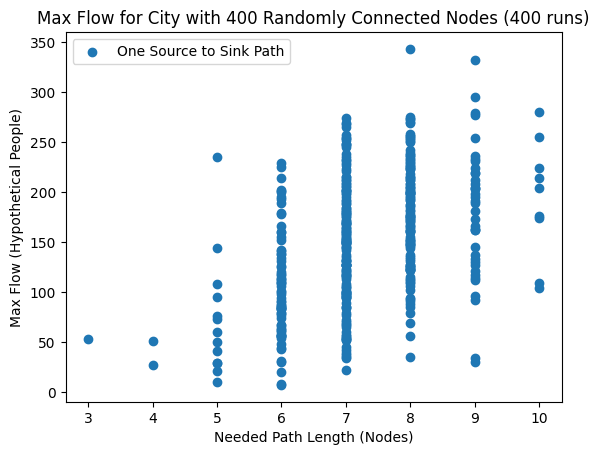

In [105]:
def connectedCity2(edgeCount):
    demo2 = cityGraph(100)

    #set bus stop names list up
    busStops = []

    for i in range(100):
        demo2.myNodeData(i, str(i))

    count = 0

    while count < edgeCount:
        count +=1
        addingEdges(demo2)


    source = random.randint(0,100)
    sink = random.randint(0,100)

    return (demo2.edmondsKarp(random.randint(0, 99), random.randint(0, 99)))

def addingEdges(demo):
    for i in range(99):
        
        demo.myEdge(i, random.randint(0, 99), random.randint(5,100))

pathLength = []
myMax = []
for i in range(400):
    cityData = (connectedCity2(4))
    if(type(cityData) is tuple):
        pathLength.append(cityData[1])
        myMax.append(cityData[0])

print("Number of paths found", len(myMax))
    

if(len(pathLength) != 0):
    #plt.title("Max Flow for City with Nodes Only Connected to Following Node")
    plt.scatter(pathLength, myMax)
    plt.ylabel("Max Flow (Hypothetical People)")
    plt.xlabel("Needed Path Length (Nodes)")
    plt.legend(['One Source to Sink Path'],loc="upper left")
    plt.title("Max Flow for City with 400 Randomly Connected Nodes (400 runs)")
    plt.show()


The above example shows the efficiency of a city where nodes are randomly connected and assigned random max flow (the same way as before), except in this example the nodes are randomly connected 400 times. For this graph, I averaged aroun 385 paths found (out of 400) for 10 runs. This means that adding 4 times the amount of connections increased the possible paths by almost 10 times. Max flow also increased from just under 100 to above 300 for the second graph. The needed path length also decreased slightly, likely because the "city" is more connected and took less stops to get to one location.

Number of paths found 400


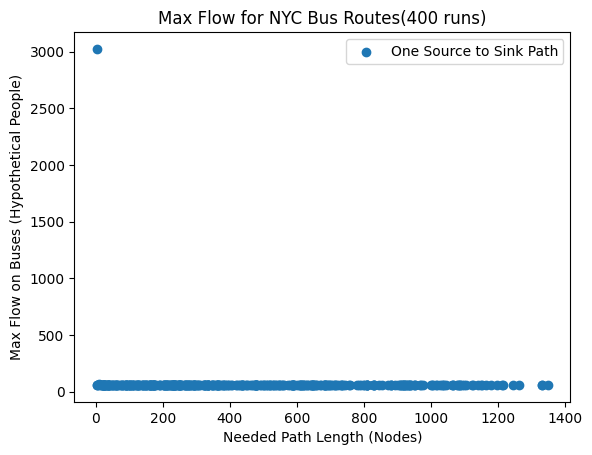

In [187]:
def bus():
    demo1 = cityGraph(1500)
    #demo2 = cityGraph(472)
    #demo3 = cityGraph(1800)
    

    for i in range(1500):
        demo1.myNodeData(i, "bus" + str(i))
        
    for i in range(1499):
         demo1.myEdge(i, i+1, random.randint(60,75))
        
    for j in range(1499, 1, -1):
         demo1.myEdge(j, j-1, random.randint(60,75))
    
  #  for i in range(230):
        
   #     counter = i * 60
    #    for j in range(61):
     #       demo1.myEdge(counter, counter+1, random.randint(60,75))
      #      counter = counter +1
            
       # counter2 = i*60
        #for k in range(counter2 + 61, counter2, -1):
         #   demo1.myEdge(counter2 +60, counter2 +59, random.randint(60,75))
          #  counter2 -=1


    count = 0

    while count < 100:
        count +=1
        addingEdges(demo1)
#.edmondsKarp(source, sink)
    

    return (demo1)
    
def addingBusEdges(demo):
    for i in range(1499):
        demo.myEdge(i, random.randint(0, 1499), random.randint(60,75))
        

pathLength = []
myMax = []
#pathLength2 = []
#myMax2 = []
pathLength3 = []
myMax3 = []

for i in range(400):
        
    busData = bus()
    source = random.randint(0,1499)
    sink = random.randint(0,1499)
    data2 = busData.edmondsKarp(source, sink)
    if(type(data2) is tuple):
        pathLength.append(data2[1])
        myMax.append(data2[0])

  
        
print("Number of paths found", len(myMax))
plt.scatter(pathLength, myMax)
#plt.scatter(pathLength2, myMax2)

plt.ylabel("Max Flow on Buses (Hypothetical People)")
plt.xlabel("Needed Path Length (Nodes)")
plt.legend(['One Source to Sink Path'],loc="upper right")
plt.title("Max Flow for NYC Bus Routes(400 runs)")
plt.show()



Here I attempted to show a visualization of how connected NYC bus routes actually are. NYC has approximately 15000 bus routes, each bus holding approximately 60-75 people (bus numbers scaled down by 10 for runtime purposes). All the bus nodes are connected to at least one other bus node because none of the bus routes are independent from all other bus routes (from what I could see) making it possible to get from almost any node to any other node even if the max flow is low and the needed path length is long. Then, I randomly connected 100 other bus nodes to attempt to increase some max flow.  

Number of paths found 239


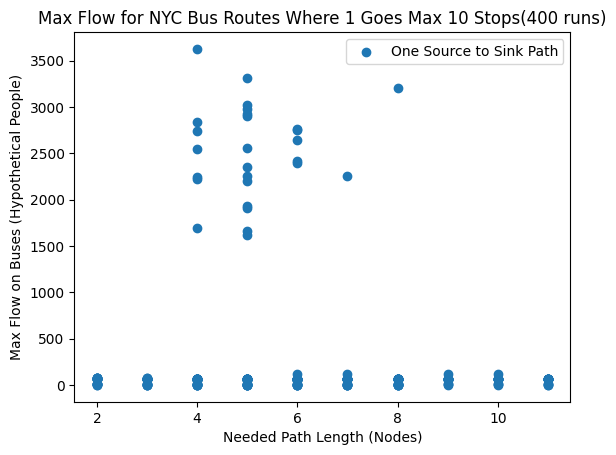

In [188]:

for i in range(400):
    #source2 = random.randint(6,11)
    #sink2 = random.randint(6,11)
    #data3 = busData.edmondsKarp(source2, sink2)
    #if(type(data3) is tuple):
      #  pathLength2.append(data3[1])
     #   myMax2.append(data3[0])

    myRand = random.randint(0,1400)
    source3 = myRand
    sink3 = myRand + random.randint(1, 10)
    data4 = busData.edmondsKarp(source3, sink3)
    if(type(data4) is tuple):
        pathLength3.append(data4[1])
        myMax3.append(data4[0])

print("Number of paths found", len(myMax3))
plt.scatter(pathLength3, myMax3)

plt.ylabel("Max Flow on Buses (Hypothetical People)")
plt.xlabel("Needed Path Length (Nodes)")
plt.legend(['One Source to Sink Path'],loc="upper right")
plt.title("Max Flow for NYC Bus Routes Where 1 Goes Max 10 Stops(400 runs)")
plt.show()


This graph uses the same assigned edges as the other graph but compares max flow when someone only needs to ride 10 stops (a much more likely scenario for most New Yorkers). Here, while the max flow still only appears to around 60-120 for most tests, for some the max flow is up to 35000, showing that even a marginal number of randomly connected nodes is useful to max flow for short rides. 

Number of paths found 100
Number of paths found 99
Number of paths found 98


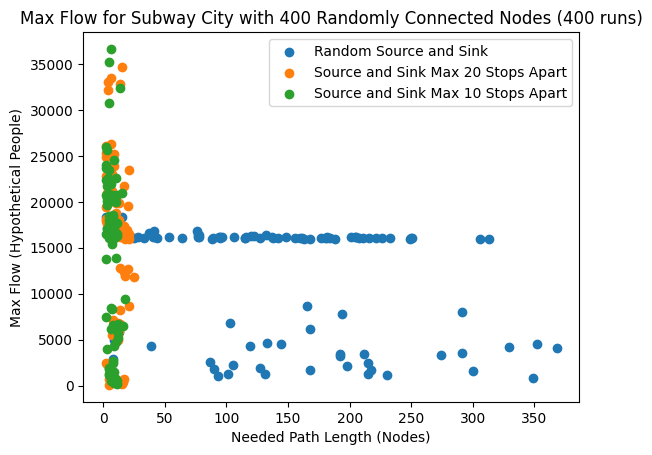

In [248]:
def sub():
    demo2 = cityGraph(472)
    

    for i in range(472):
        demo2.myNodeData(i, "sub" + str(i))
        
  

    
   # for i in range(29):
    #    counter = i * 16
     #   for j in range(16):
      #      demo2.myEdge(counter, counter+1, random.randint(1600,2800))
       #     counter = counter +1
            
        #counter2 = i*16
        #for k in range(counter2 + 16, counter2, -1):
         #   demo2.myEdge(counter2 +16, counter2 +15, random.randint(1600,2800))
          #  counter2 -=1

    for k in range(471):
         demo2.myEdge(k, k+1, random.randint(16000,28000))
        
    for j in range(471, 1, -1):
         demo2.myEdge(j, j-1, random.randint(16000,28000))


    count = 0

    while count < 25:
        count +=1
        addingEdges(demo2)
#.edmondsKarp(source, sink)
    

    return (demo2)
    
def addingSubEdges(demo):
    for i in range(472):
        
        demo.myEdge(i, random.randint(0, 472), random.randint(1600,2800))

pathLengthZ = []
myMaxZ = []
pathLengthX = []
myMaxX = []
pathLengthY = []
myMaxY = []


for i in range(100):
    subData = sub()
    sourceZ = random.randint(0,450)
    sinkZ = random.randint(0,471)
    dataSub = subData.edmondsKarp(sourceZ, sinkZ)
    if(type(dataSub) is tuple):
        pathLengthZ.append(dataSub[1])
        myMaxZ.append(dataSub[0])

    myRand2 = random.randint(0,450)
    sourceX = myRand2
    sinkX = myRand2 + random.randint(0,20)
    dataSub3 = subData.edmondsKarp(sourceX, sinkX)
    if(type(dataSub3) is tuple):
        pathLengthX.append(dataSub3[1])
        myMaxX.append(dataSub3[0])

    myRand = random.randint(0,450)
    sourceY = myRand
    sinkY = myRand + random.randint(1, 10)
    dataSub2 = subData.edmondsKarp(sourceY, sinkY)
    if(type(dataSub2) is tuple):
        pathLengthY.append(dataSub2[1])
        myMaxY.append(dataSub2[0])
  
        

    

plt.scatter(pathLengthZ, myMaxZ, label="Random Source and Sink")
plt.scatter(pathLengthX, myMaxX, label="Source and Sink Max 20 Stops Apart")
plt.scatter(pathLengthY, myMaxY, label="Source and Sink Max 10 Stops Apart")
print("Number of paths found", len(myMaxZ))
print("Number of paths found", len(myMaxX))
print("Number of paths found", len(myMaxY))
plt.ylabel("Max Flow (Hypothetical People)")
plt.xlabel("Needed Path Length (Nodes)")
plt.legend(loc="upper right")
plt.title("Max Flow for Subway City with 400 Randomly Connected Nodes (400 runs)")
plt.show()


This graph shows the difference between max flow for subway stops (there are about 472 subways stops in New York with each subway car holding 1600 to 2800 people) with random start and end stops, start and end stops with a maximum of 20 feet apart, and subway start and end stops with a maximum of 10 stops apart. I was surprised by the difference between the stops with a max of 10 and 20 feet apart. Again, subway nodes were all connected to allow a path no matter the start and stop with 25 random connections added. There wasn't much. of a max flow difference between random stops and stops with a max difference of 20 nodes, which to me shows that knowing how far New Yorkers are going on average is important to know how many connections between different stops are needed. 

Number of paths found 200
Number of paths found 191
Number of paths found 371
Number of paths found 0


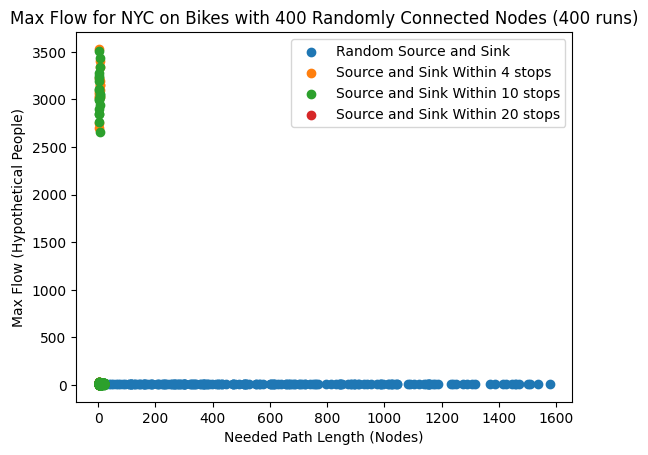

In [255]:
def bike():
    demo3 = cityGraph(1800)
    

    for i in range(1800):
        demo3.myNodeData(i, "bike" + str(i))
        
  
    
        
    for j in range(1799):
        demo3.myEdge(j, j+1, random.randint(10,20))

    for k in range(1799, 1, -1):
        demo3.myEdge(k, k-1, random.randint(10,20))

    

    count = 0

    while count < 100:
        count +=1
        addingEdges(demo3)
#.edmondsKarp(source, sink)
    

    return (demo3)
    
def addingBikeEdges(demo):
    for i in range(1799):
        
        demo.myEdge(i, random.randint(0, 1799), random.randint(10,20))

pathLengthB = []
myMaxB = []
pathLengthC = []
myMaxC = []
pathLengthD = []
myMaxD = []
pathLengthE = []
myMaxE = []


for i in range(200):
    bikeData = bike()
    sourceB = random.randint(0,1799)
    sinkB = random.randint(0,1799)
    dataBike = bikeData.edmondsKarp(sourceB, sinkB)
    if(type(dataBike) is tuple):
        pathLengthB.append(dataBike[1])
        myMaxB.append(dataBike[0])
    
 

    myRandC = random.randint(0,1700)
    sourceC = myRandC
    sinkC = myRandC + random.randint(1, 4)
    dataBike2 = bikeData.edmondsKarp(sourceC, sinkC)
    if(type(dataBike2) is tuple):
        pathLengthC.append(dataBike2[1])
        myMaxC.append(dataBike2[0])
  
        
    myRandD = random.randint(0,1700)
    sourceD = myRandD
    sinkD = myRandD + random.randint(1, 10)
    dataBike3 = bikeData.edmondsKarp(sourceD, sinkD)
    if(type(dataBike3) is tuple):
        pathLengthD.append(dataBike3[1])
        myMaxD.append(dataBike3[0])
        
    myRandE = random.randint(0,1700)
    sourceE = myRandE
    sinkE = myRandE + random.randint(1, 20)
    dataBike4 = bikeData.edmondsKarp(sourceE, sinkE)
    if(type(dataBike4) is tuple):
        pathLengthD.append(dataBike4[1])
        myMaxD.append(dataBike4[0])
    

plt.scatter(pathLengthB, myMaxB, label = "Random Source and Sink")
plt.scatter(pathLengthC, myMaxC, label = "Source and Sink Within 4 stops")
plt.scatter(pathLengthD, myMaxD, label = "Source and Sink Within 10 stops")
plt.scatter(pathLengthE, myMaxE, label = "Source and Sink Within 20 stops")
print("Number of paths found", len(myMaxB))
print("Number of paths found", len(myMaxC))
print("Number of paths found", len(myMaxD))
print("Number of paths found", len(myMaxE))
plt.ylabel("Max Flow (Hypothetical People)")
plt.xlabel("Needed Path Length (Nodes)")
plt.legend(loc="upper right")
plt.title("Max Flow for NYC on Bikes with 400 Randomly Connected Nodes (400 runs)")
plt.show()


This graph completes my exploration of different types of transport in New York City where I compared bike stations (appoximately 1800 bike stations (30000 bikes total so I assigned a max flow of 10-20 for each station)). This graph takes a very long time to run because there are more bike station and I connected them more than the other two graphs because in theory any Citi Bike should be able to get to any other station. This graph shows that for bikes, it didn't really matter whether bikes are 20, 10 or 4 nodes apart. Both did significantly better than random bike stops. 

In [ ]:
plt.scatter(pathLength3, myMax3, label = "bus (10 Stops Max)")
plt.scatter(pathLengthY, myMaxY, label="subway (10 Stops Max)")
plt.scatter(pathLengthD, myMaxD, label="bike (10 Stops Max)")
plt.legend(loc="upper right")
plt.title("Max Flow Bike v. Subway v. Bus")
plt.show()

This graph overlays bus, bike, and subway modes of transport where each time the mode of transportation only needs a max of 10 stops. The subway does drastically better and the bus and bike routes are very similar (bus routes are behind the bike routes). It makes sense that subway max flow would be so much higher because it carries 2000 people compared to around 15 or 70 people. It also only has a total of 472 stops, so it is better connected.

In [252]:
def bikeOpt():
    demo4 = cityGraph(1800)
    

    for i in range(1800):
        demo4.myNodeData(i, "bike" + str(i))
        
          
    #for j in range(1799):
     #   demo3.myEdge(j, j+1, random.randint(10,20))

   # for k in range(1799, 1, -1):
    #    demo3.myEdge(k, k-1, random.randint(10,20))

    

    #count = 0

    #while count < 200:
     #   count +=1
      #  addingEdges(demo3)
    

    return (demo4)
    
def addingBikeEdges(demo):
    for i in range(1799):
        
        demo.myEdge(i, random.randint(0, 1799), random.randint(10,20))

pathLengthB2 = []
myMaxB2 = []
#pathLength2 = []
#myMax2 = []
#pathLengthY = []
#myMaxY = []
bikeData = bikeOpt()
edgeCounted = 0
edgeNot = 0
for i in range(5000):
    
    sourceB2 = random.randint(0,1799)
    sinkB2 = random.randint(0,1799)
    maxAndPath = bikeData.edmondsKarp(sourceB2, sinkB2)
    if(type(maxAndPath) is tuple):
        edgeCounted +=1
        #pathLengthB2.append(maxAndPath[1])
        #myMaxB2.append(maxAndPath[0])
    else: 
        edgeNot +=1
        bikeData.myEdge(sourceB2, sinkB2, random.randint(10,20)) #bikeData is type of cityGraph
        maxAndPath = bikeData.edmondsKarp(sourceB2, sinkB2)
        #pathLengthB2.append(newBikeData[1])
        #myMaxB2.append(newBikeData[0])
    


This takes like 15 minutes to run^

Number of paths found 744


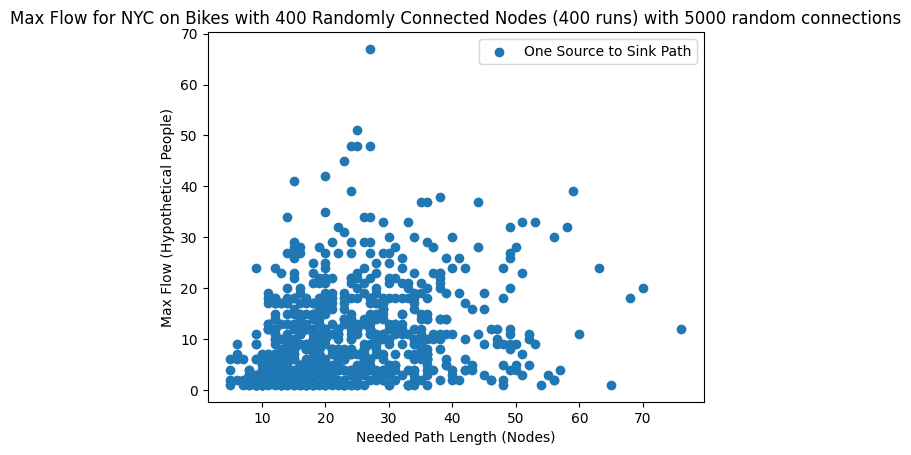

In [251]:
for i in range(400):
    sourceB3 = random.randint(0,1799)
    sinkB3 = random.randint(0,1799)
    trialBike = bikeData.edmondsKarp(sourceB3, sinkB3)
    if(type(trialBike) is tuple):
        pathLengthB2.append(trialBike[1])
        myMaxB2.append(trialBike[0])
        
    

  
    
   

plt.scatter(pathLengthB2, myMaxB2)
#plt.scatter(pathLengthB, myMaxB, label = "Non-Random Connections")
#plt.scatter(pathLength2, myMax2)
#plt.scatter(pathLengthY, myMaxY)
plt.ylabel("Max Flow (Hypothetical People)")
plt.xlabel("Needed Path Length (Nodes)")
plt.legend(['One Source to Sink Path'],loc="upper right")
plt.title("Max Flow for NYC on Bikes with 400 Randomly Connected Nodes (400 runs) with 5000 random connections")
plt.show()

This graph shows that when a hypothetical bike path started with 0 initial connections, after 5000 random connections were attempted, over half of the runs were successful in finding a connection. To me, this shows that max flow could be optimized by tracking the connection attempts citizens make and then building node connections are that. This method did better than the graph of random sources and sinks (which this graph also used) in terms of stops needed (likely because a path often had to go through all the stops to get to the correct one), about the same (maybe very slightly better) in terms of max flow, and worse in terms of overall paths found because there is not a guaranteed path between nodes in this graph, but it does show a way of quickly optimizing max flow and number of stops needed to make.

BIG O ANALYSIS:

The Edmonds-Karp Algorithm is in polynomial time because it uses a breadth first search (BFS) which is O(E) scaling on the number of edges and nodes because each edge must (potentially) be searched to find the path (this is closer to best case than worst case). The worst case BFS scaling is O(VE) because it may have to go through all nodes and their edges, and with the augmented paths given by Edmonds-Karp, BFS must look through every augmented path. This makes the time complexity O(VE^2), or polynomial time, because it is best case BFS O(E) multipled by the case with each augmented path O(VE). 

 

https://en.wikipedia.org/wiki/Citi_Bike#:~:text=As%20of%202023%2C%20there%20are%20about%2033%2C000%20bicycles%20in%20the,increased%20to%2035%2C000%20by%202025.  

https://www.mta.info/agency/new-york-city-transit/subway-bus-facts-2019  

https://www.mta.info/agency/new-york-city-transit/subway-bus-ridership-2022#:~:text=Overview%20of%20New%20York%20City's%20transit%20system&text=Our%20system%20includes%3A,236%20local%20bus%20routes  

https://www.w3schools.com/dsa/dsa_algo_graphs_edmondskarp.php 



helpful code to write the algorithm and to get data about NYC Transportation